# Library and Dataset Setup

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
dataset = tf.keras.datasets.mnist

In [ ]:
(x_train, y_train),(x_test, y_test) = dataset.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


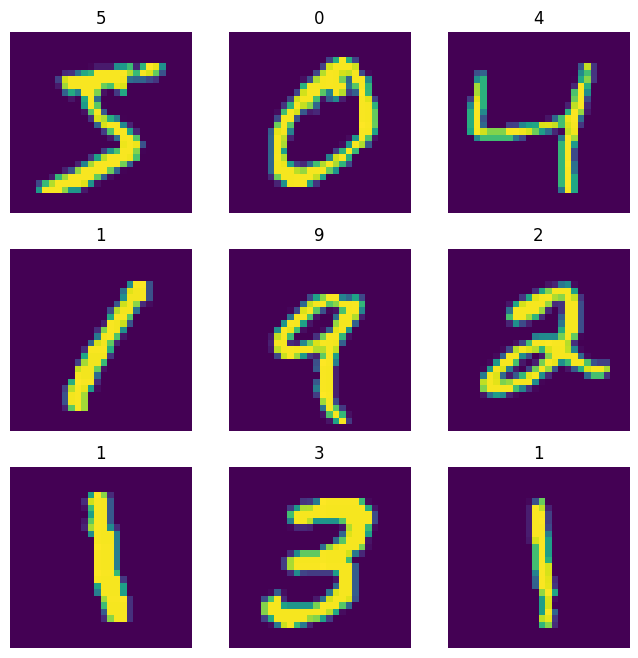

In [ ]:
plt.figure(figsize=(8,8))
for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.imshow(x_train[i])
  plt.title(y_train[i])
  plt.axis('off')

In [ ]:
x_train = tf.keras.utils.normalize(x_train, axis=-1)
x_test = tf.keras.utils.normalize(x_test, axis=-1)

# Building the Model

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 111,146 (434.16 KB)

 Trainable params: 111,146 (434.16 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=32, epochs=50)

Epoch 1/69
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9959 - loss: 0.0108 - val_accuracy: 0.9728 - val_loss: 0.1442
Epoch 2/69
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9951 - loss: 0.0150 - val_accuracy: 0.9779 - val_loss: 0.1105
Epoch 3/69
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9969 - loss: 0.0098 - val_accuracy: 0.9743 - val_loss: 0.1302
Epoch 4/69
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9976 - loss: 0.0074 - val_accuracy: 0.9762 - val_loss: 0.1249
Epoch 5/69
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9973 - loss: 0.0086 - val_accuracy: 0.9774 - val_loss: 0.1169
Epoch 6/69
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9969 - loss: 0.0095 - val_accuracy: 0.9776 - val_loss: 0.1189
Epoch 7/69
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9963 - loss: 0.0110 - val_accuracy: 0.9783 - val_loss: 0.1275
Epoch 8/69
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9973 - loss: 0.0081 

# Saving the Model


In [ ]:
model.save('/content/Digit_Recognition.keras')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('Digit_Recognition.tflite', 'wb') as f:
    f.write(tflite_model)

Saved artifact at '/tmp/tmpribjxdlv'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  132731207636880: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132728420072720: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132728420073104: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132731207637072: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132728358178640: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132728358177104: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132728358182672: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132728358177488: TensorSpec(shape=(), dtype=tf.resource, name=None)
